In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import numpy as np
from hyperparameters import radius, n

In [2]:
# Replace 'your_position_file.csv' with the actual file name
file_name = 'out.csv'

# Read the position data
df = pd.read_csv(file_name)


In [3]:
radius

50

In [4]:
n

20

In [5]:
df

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y
0,49.956452,1.962991,-49.956452,1.962991,-49.956452,-1.962991,49.956452,-1.962991,49.840867,3.922955,...,49.379417,-7.821723,49.034264,9.754516,-49.034264,9.754516,-49.034264,-9.754516,49.034264,-9.754516
1,49.944381,1.963006,-49.944381,1.962978,-49.944381,-1.963004,49.944381,-1.962984,49.828796,3.922940,...,49.367346,-7.821727,49.022193,9.754513,-49.022193,9.754537,-49.022193,-9.754517,49.022193,-9.754540
2,49.922310,1.963038,-49.922310,1.962941,-49.922310,-1.963019,49.922310,-1.962988,49.806725,3.922908,...,49.345275,-7.821775,49.000122,9.754513,-49.000122,9.754649,-49.000122,-9.754495,49.000122,-9.754579
3,49.914687,1.964800,-49.886097,1.962956,-49.914687,-1.964743,49.886097,-1.962938,49.741921,3.921139,...,49.309062,-7.821749,48.963909,9.754453,-48.963910,9.754795,-48.963909,-9.754504,48.963909,-9.754617
4,49.899173,1.967180,-49.829884,1.963015,-49.899168,-1.967104,49.829883,-1.962954,49.645316,3.918435,...,49.281219,-7.825723,48.888382,9.751359,-48.907698,9.754947,-48.879502,-9.749426,48.907696,-9.754726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,-55.681806,2.094655,54.337371,4.021437,54.927358,-2.033795,-45.773573,0.389152,-52.216125,-0.278061,...,-53.755185,-6.121809,-52.654198,6.488772,44.479418,10.830331,44.311779,-9.802249,-44.994282,-12.624021
1103,-55.337234,2.033253,54.337371,4.021437,54.927358,-2.033795,-45.773573,0.389152,-52.216125,-0.278061,...,-53.755185,-6.121809,-52.654198,6.488772,44.479418,10.830331,44.311779,-9.802249,-44.994282,-12.624021
1104,-54.992789,1.971149,54.337371,4.021437,54.927358,-2.033795,-45.773573,0.389152,-52.216125,-0.278061,...,-53.755185,-6.121809,-52.654198,6.488772,44.479418,10.830331,44.311779,-9.802249,-44.994282,-12.624021
1105,-54.648354,1.908980,54.337371,4.021437,54.927358,-2.033795,-45.773573,0.389152,-52.216125,-0.278061,...,-53.755185,-6.121809,-52.654198,6.488772,44.479418,10.830331,44.311779,-9.802249,-44.994282,-12.624021


In [7]:
import numpy as np

def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

number_of_uavs = 20  # Update this based on your actual number of UAVs
total_distances = np.zeros(number_of_uavs)  # An array to store total distances for each UAV
prev_positions = [None] * number_of_uavs * 2  # To store previous x and y positions for each UAV

with open('out.csv', 'r') as file:
    next(file)  # Skip the header
    for line in file:
        positions = line.strip().split(',')
        for uav_id in range(number_of_uavs):
            x_index = uav_id * 2
            y_index = uav_id * 2 + 1
            x = float(positions[x_index])
            y = float(positions[y_index])

            # If it's not the first position, calculate the distance from the previous position
            if prev_positions[x_index] is not None and prev_positions[y_index] is not None:
                distance = calculate_distance(prev_positions[x_index], prev_positions[y_index], x, y)
                total_distances[uav_id] += distance

            # Update the previous positions
            prev_positions[x_index], prev_positions[y_index] = x, y

# Print the total distances for each UAV
for uav_id in range(number_of_uavs):
    print(f"{total_distances[uav_id]}")


378.9103010238645
139.4277867387174
125.79459515671746
95.97769252941822
152.1206949484793
97.765247249761
127.29784992535029
127.33393437168033
199.7940397945638
94.68481952601482
129.08523138479643
94.8714642603774
96.62142773589686
94.15015093067447
95.44915094538071
122.08791770499289
216.3569118124266
93.52763927862803
94.51990750226079
94.18658355646161


In [8]:
priority = open('priority.csv', 'r')
priority = priority.read()
priority = priority.split(", ")
priority = np.array([float(x) for x in priority],dtype=np.float16)
priority

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3.], dtype=float16)

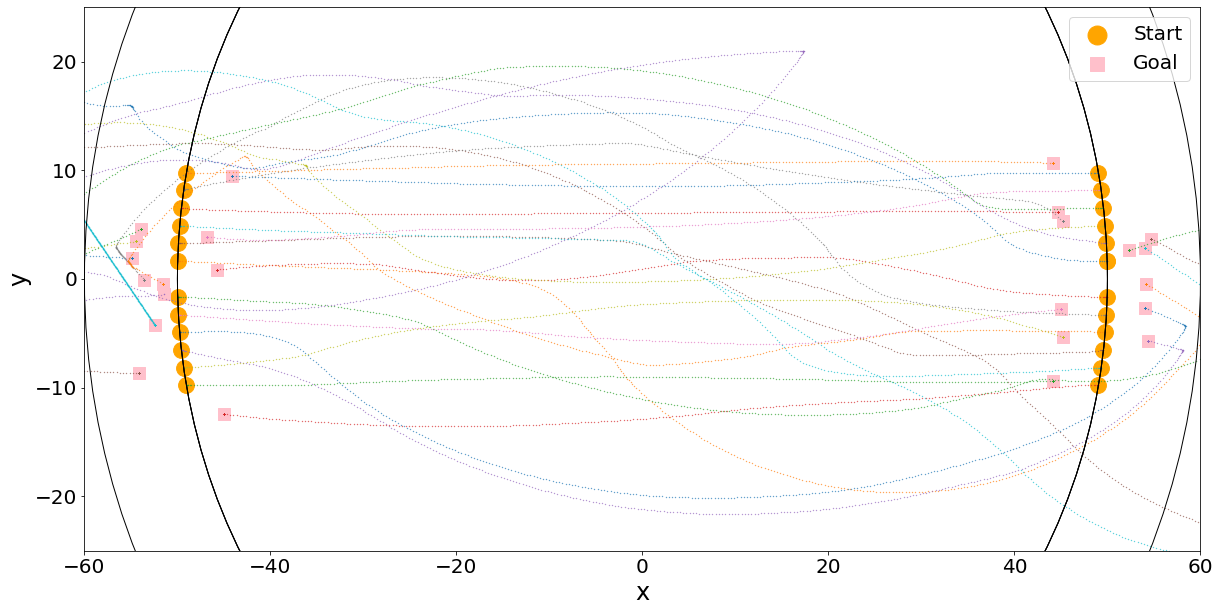

In [14]:
fig,axes = plt.subplots(figsize=(20,10))
axes.set_xlim([-radius,radius])
axes.set_ylim([-radius,radius])
starts = []
for i in range(n):
    axes.scatter(df[str(i)+'x'].iloc[0],df[str(i)+'y'].iloc[0], marker="o", color='orange', s=250)
    axes.scatter(df[str(i)+'x'].iloc[-1],df[str(i)+'y'].iloc[-1], marker="s", color='pink', s=125)

axes.scatter(df[str(0)+'x'].iloc[0],df[str(0)+'y'].iloc[0], marker="o", color='orange', s=250, label='Start')
axes.scatter(df[str(0)+'x'].iloc[-1],df[str(0)+'y'].iloc[-1], marker="s", color='pink', s=125, label='Goal')

axes.legend(markerscale=1.2, fontsize=20)

for i in range(n):
    #c = priority[i]
    plt.scatter(df[str(i)+'x'],df[str(i)+'y'],s=0.1)
#plt.legend(priority, markerscale=20)

c2 = plt.Circle((0,0), radius, fill=False)
c1 = plt.Circle((0,0), radius, fill=False)
plt.gca().add_artist(c2)
plt.gca().add_artist(c1)

plt.xlim(-1.2*radius, 1.2*radius)
plt.ylim(-radius/2,radius/2)
#plt.ylim(-20,20)

plt.gca().add_patch(plt.Circle((0,0), radius, fill=False))
plt.gca().add_patch(plt.Circle((0,0), 1.2*radius, fill=False))
plt.xlabel('x', fontsize=24)
plt.ylabel('y', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)




#plt.show()
#plt.savefig('/media/storage/Agam/pca/plots/comparison plots/8_paths_spread_piby8.eps', format='eps')

plt.show()

In [ ]:
# Filter the data for a specific UAV, e.g., UAV with ID 1
uav_id = 1
uav_data = df[df['UAV_ID'] == uav_id]

# Ensure the data is sorted by time if your file includes a timestamp
# If there's a 'timestamp' column, you would do something like:
# uav_data = uav_data.sort_values(by='timestamp')

# Calculate the total distance traveled
total_distance = 0.0
for i in range(1, len(uav_data)):
    # Calculate the Euclidean distance between consecutive positions
    distance = np.sqrt((uav_data.iloc[i]['X'] - uav_data.iloc[i-1]['X'])**2 + (uav_data.iloc[i]['Y'] - uav_data.iloc[i-1]['Y'])**2)
    total_distance += distance

print(f"Total distance traveled by UAV {uav_id}: {total_distance}")
